In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib

In [2]:
df = pd.read_csv('../../data/yinance/AAPL.csv')
df.head()
df.describe()

,Close,High,Low,Open,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,53.841169,54.383801,53.247465,53.801628,2.640640e+08
std,55.064042,55.627235,54.440128,55.009182,2.345629e+08
min,2.345299,2.459265,2.345299,2.380989,2.404830e+07
25%,15.050355,15.183043,14.901886,15.007580,9.581845e+07
50%,26.975808,27.168844,26.836844,27.010205,1.667348e+08
75%,74.664204,75.252383,73.553555,74.127927,3.777410e+08
max,196.256592,197.752460,195.156944,196.167437,1.880998e+09


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

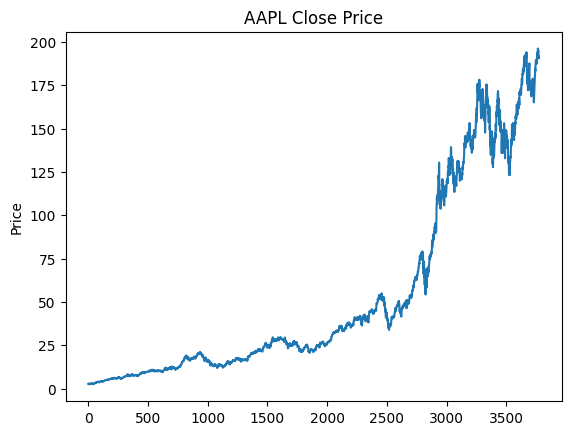

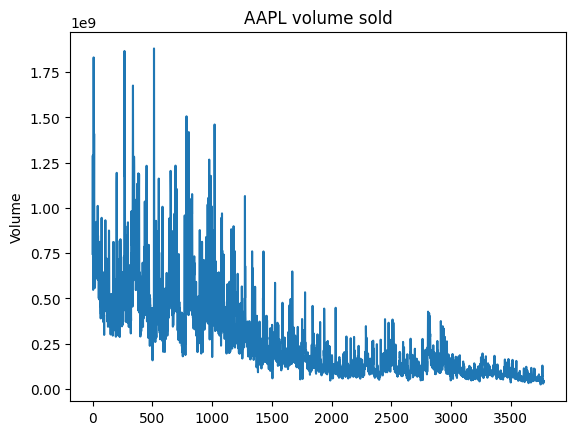

In [4]:
df['Close'].plot(title="AAPL Close Price")
plt.ylabel("Price")
plt.show()

df['Volume'].plot(title="AAPL volume sold")
plt.ylabel("Volume")
plt.show()

In [5]:
price= df["Close"]
df["SMA_20"] = talib.SMA(price, timeperiod=20)
df["SMA_50"] = talib.SMA(price, timeperiod=50)
df["EMA_20"] = talib.EMA(price, timeperiod=20)

df["RSI_14"] = talib.RSI(price, timeperiod=14)

df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
    price, 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

df.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,191.856618,183.572859,191.510231,54.672784,2.633141,3.235256,-0.602115
3770,2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,192.018094,183.858864,191.484867,53.090049,2.304751,3.049155,-0.744404
3771,2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,192.154308,184.149424,191.471353,53.354446,2.029104,2.845145,-0.816041
3772,2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,192.362839,184.479567,191.499696,54.540999,1.823998,2.640915,-0.816918
3773,2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100,192.490633,184.814828,191.426275,51.121347,1.559539,2.424640,-0.865101


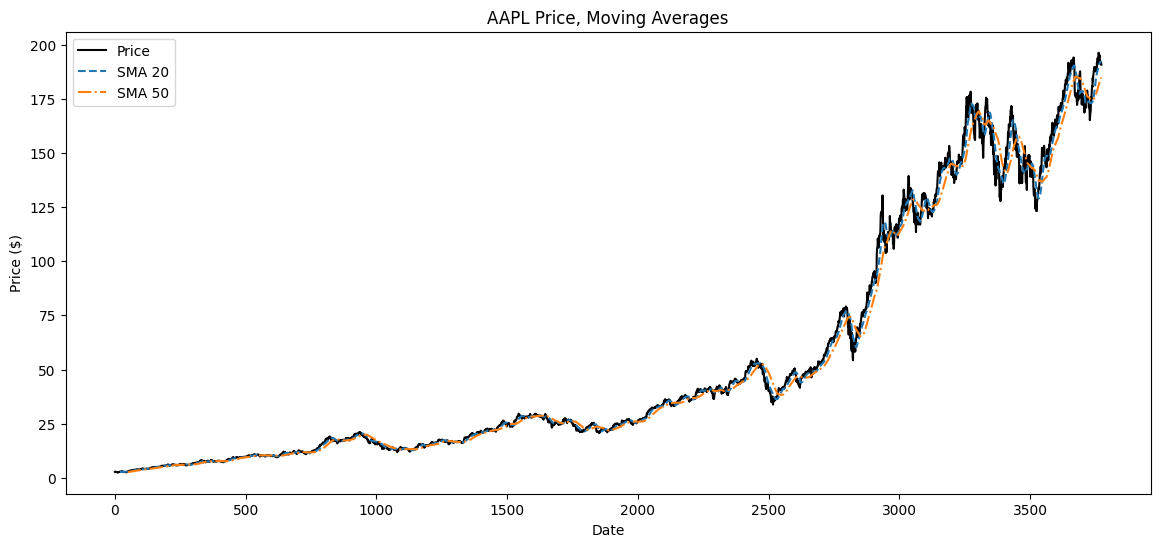

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df.index, price, label="Price", color="black")
ax.plot(df.index, df["SMA_20"], label="SMA 20", linestyle="--")
ax.plot(df.index, df["SMA_50"], label="SMA 50", linestyle="-.")
ax.set_title("AAPL Price, Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()

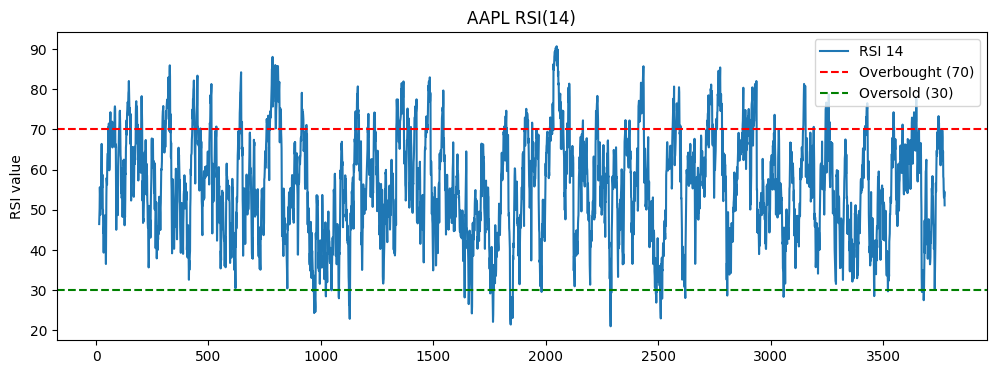

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df.index, df["RSI_14"], label="RSI 14")
ax.axhline(70, color="red", linestyle="--", label="Overbought (70)")
ax.axhline(30, color="green", linestyle="--", label="Oversold (30)")
ax.set_title("AAPL RSI(14)")
ax.set_ylabel("RSI value")
ax.legend()
plt.show()

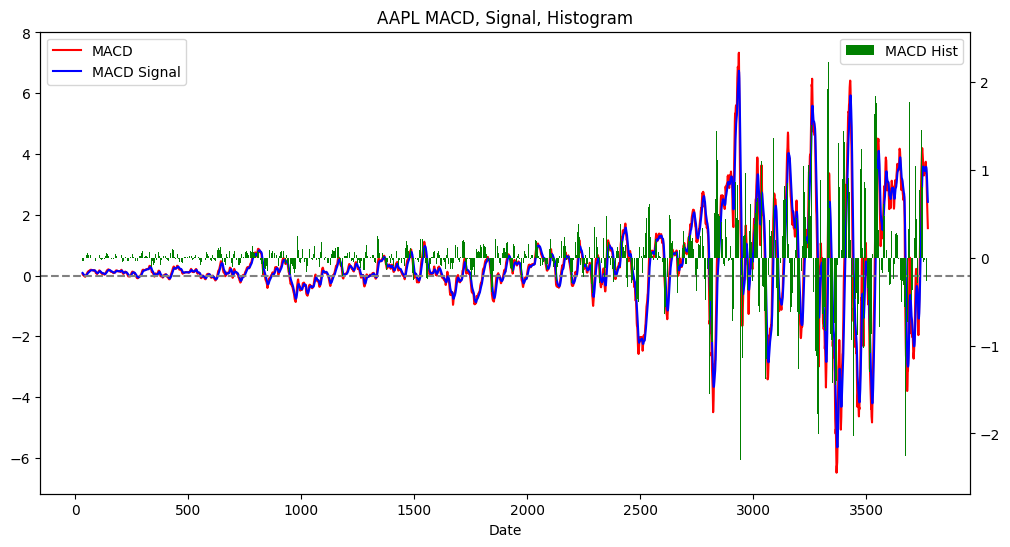

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df["MACD"], label="MACD", color="red")
ax.plot(df.index, df["MACD_signal"], label="MACD Signal", color="blue")
ax.axhline(0, color="grey", linestyle="--")
ax2 = ax.twinx()
ax2.bar(df.index, df["MACD_hist"], label="MACD Hist", color="green")

ax.set_title("AAPL MACD, Signal, Histogram")
ax.set_xlabel("Date")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()